### Name : Dhwani Hingu | Student No. : x19216742 | Subject : DMML

# Research Question: What are the factors that mostly impact on an employee salary greater than $50k?

## Load Basic Libraries

In [141]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load libraries
#from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.svm import SVC
import missingno as msno
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder


In [84]:
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [85]:
train= pd.read_csv('C:/Users/Ab/Desktop/DMML_Python/HR_Analytics-Datasets/Adult Census Income/adult.csv')
print("Structure of Dataset:", train.shape)
display(train.head())
print("Data type of each columnL\n", train.dtypes)


Structure of Dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Data type of each columnL
 age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


## Checking Null Values

In [86]:
print("Checking Null Values:\n", train.isnull().sum())

Checking Null Values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


### In the dataset I observed that there are no missing values but instead there are lot of "?" values
### So i checked whether how many such '?' are there in each column.

In [87]:
find_null = (train == '?').sum()

In [88]:
find_null

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Checking number of unique values in each column

In [89]:
print("Cheking number of unique values:\n", train.nunique())

Cheking number of unique values:
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [90]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [91]:
train['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [92]:
train['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [93]:
train['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

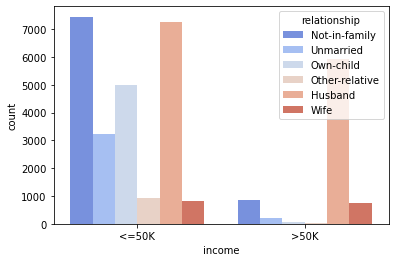

In [94]:
sns.countplot(train['income'], palette='coolwarm', hue='relationship', data=train);

In [95]:
train['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

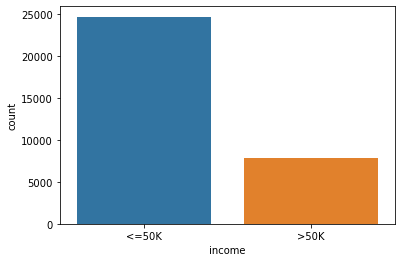

In [96]:
sns.countplot(x='income', data=train)
plt.show()

In [97]:
train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [98]:
emp_salary = train.copy()

In [99]:
emp_salary.replace({"?": np.nan}, inplace = True)
emp_salary.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [100]:
emp_salary.isna().count().sum()

488415

<AxesSubplot:>

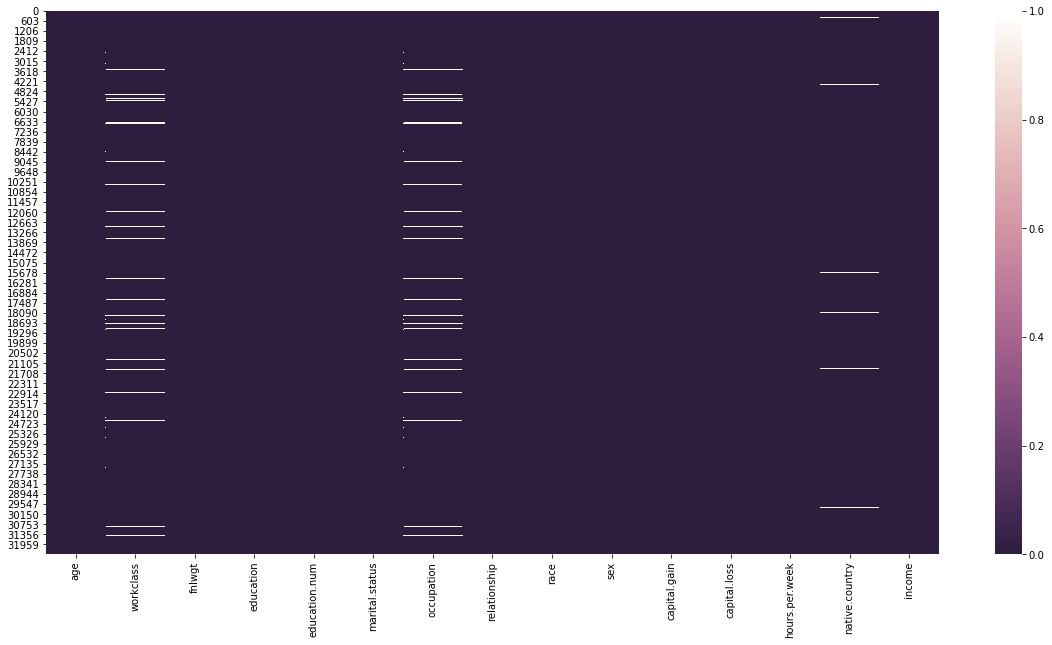

In [101]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

# We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(emp_salary.isnull(), cmap=cmap)

In [102]:
emp_salary.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [103]:
emp_salary.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

## Dropping Null Values

In [104]:
emp_salary = emp_salary.dropna()

In [105]:
emp_salary.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [106]:
emp_salary.shape

(30162, 15)

## Dropping unnessary column

In [107]:
emp_salary.drop(['fnlwgt', 'education.num'], axis = 1, inplace=True)

In [108]:
emp_salary

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Feature Engineering

#### will do label encoding for odinal data

In [109]:
#income column --> <=50 = 0 and >50 = 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
emp_salary["income"] = le.fit_transform(emp_salary["income"])


In [110]:
# education Category
emp_salary.education= emp_salary.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
emp_salary.education = emp_salary.education.replace('HS-grad', 'high school')
emp_salary.education = emp_salary.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
emp_salary.education = emp_salary.education.replace('Bachelors', 'undergrad')
emp_salary.education = emp_salary.education.replace('Masters', 'grad')
emp_salary.education = emp_salary.education.replace('Doctorate', 'doc')

In [111]:
emp_salary['education'].value_counts()

high school    9840
higher         9535
undergrad      5044
school         3741
grad           1627
doc             375
Name: education, dtype: int64

In [112]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
def ord_encode(df, col_name, cats):
    df[col_name]= OrdinalEncoder(categories= [cats], dtype= int).fit_transform(emp_salary[col_name].values.reshape(-1,1))
    #test[col_name]= OrdinalEncoder(categories= [cats], dtype= int).fit_transform(new_df[col_name].values.reshape(-1,1))
    return df

In [113]:
emp_salary= ord_encode(emp_salary, 'education', ['school','high school', 'higher', 'undergrad', 'grad','doc'])

In [114]:
emp_salary['marital.status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [115]:
emp_salary['marital.status']= emp_salary['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
emp_salary['marital.status']= emp_salary['marital.status'].replace(['Never-married'], 'not-married')
emp_salary['marital.status']= emp_salary['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [116]:
emp_salary['native.country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [117]:
emp_salary

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,1,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,0,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,2,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,1,other,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,0,other,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,2,not-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,2,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,1,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,1,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [118]:
sal = emp_salary.copy()

In [119]:
sal.nunique()

age                72
workclass           7
education           6
marital.status      3
occupation         14
relationship        6
race                5
sex                 2
capital.gain      118
capital.loss       90
hours.per.week     94
native.country     41
income              2
dtype: int64

In [120]:
#checking how many columns will get created after one hot encoding these variables
sal_dummy_df = pd.get_dummies(sal,drop_first=True)

In [121]:
sal_dummy_df.nunique()

age                                72
education                           6
capital.gain                      118
capital.loss                       90
hours.per.week                     94
                                 ... 
native.country_Thailand             2
native.country_Trinadad&Tobago      2
native.country_United-States        2
native.country_Vietnam              2
native.country_Yugoslavia           2
Length: 77, dtype: int64

In [122]:
sal_dummy_df

,age,education,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,1,0,4356,18,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,0,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,2,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,1,0,3770,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,0,0,3770,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,2,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,1,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Checking Outliers with boxplot

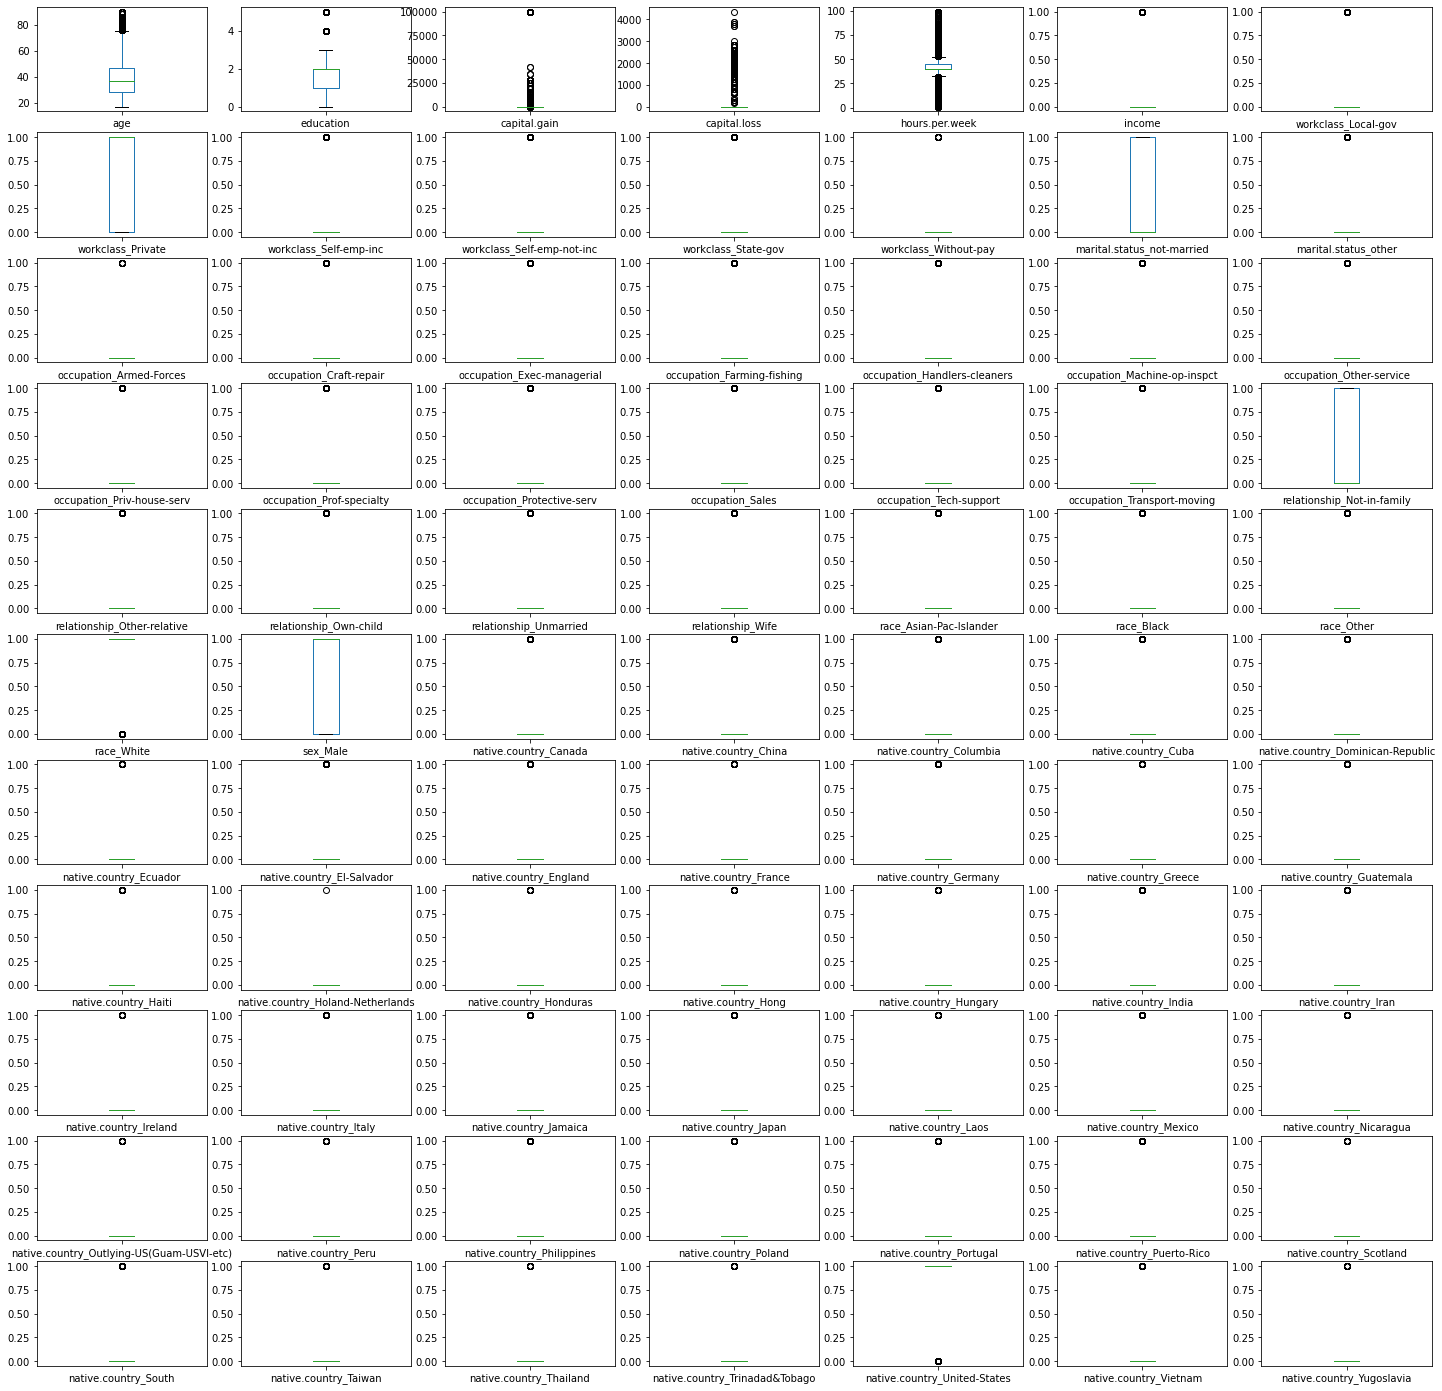

In [126]:
sal_dummy_df.plot(kind='box', figsize=(25,25), layout=(11,7),sharex=False, subplots=True);

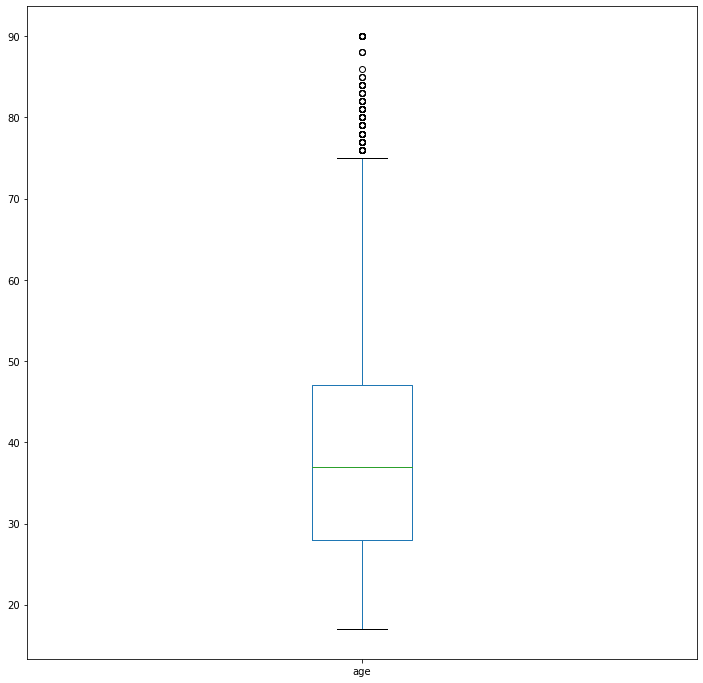

In [127]:
sal_dummy_df['age'].plot(kind='box', figsize=(12,12),  sharex=False, subplots=True);

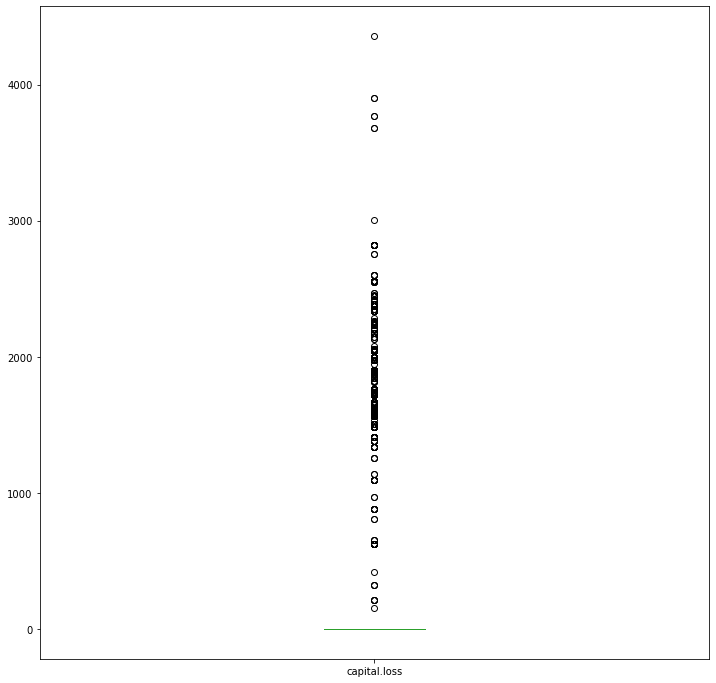

In [128]:
#capital.loss
sal_dummy_df['capital.loss'].plot(kind='box', figsize=(12,12),  sharex=False, subplots=True);

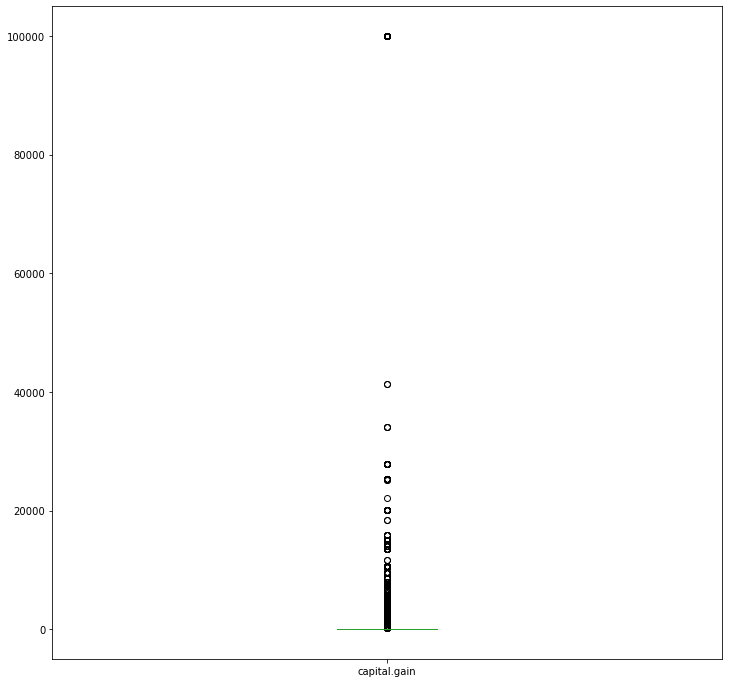

In [202]:
#capital.gain
sal_dummy_df['capital.gain'].plot(kind='box', figsize=(12,12),  sharex=False, subplots=True);

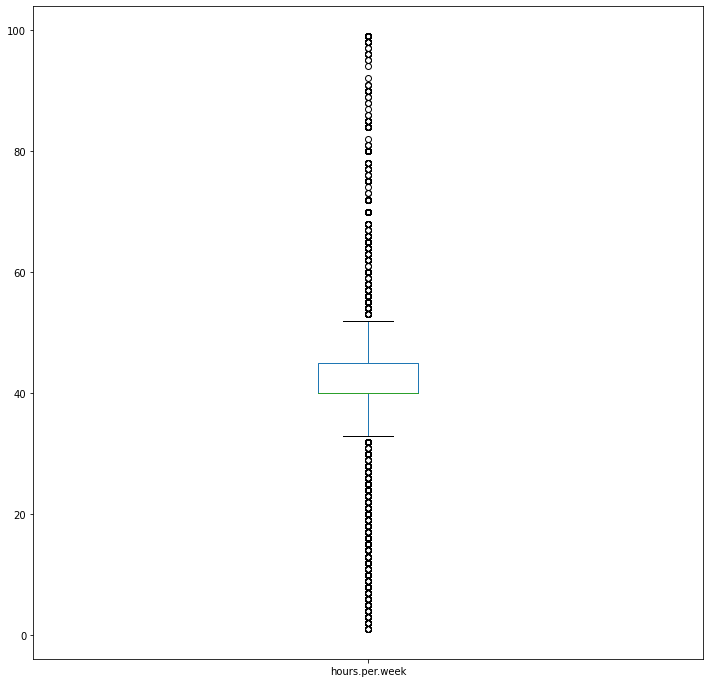

In [130]:
#hours.per.week
sal_dummy_df['hours.per.week'].plot(kind='box', figsize=(12,12),  sharex=False, subplots=True);

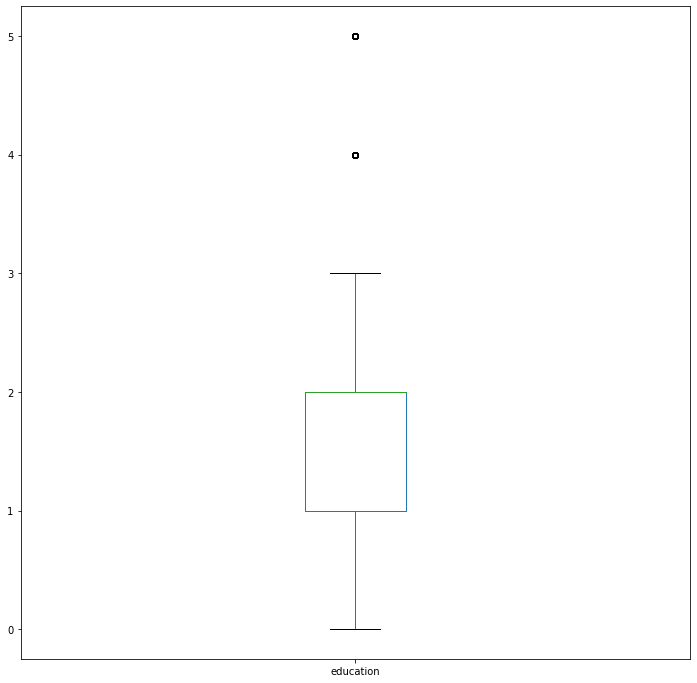

In [421]:
#education
sal_dummy_df['education'].plot(kind='box', figsize=(12,12),  sharex=False, subplots=True);

## Balacing data with SMOTE

In [131]:
sal_dummy_df

,age,education,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,1,0,4356,18,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,0,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,2,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,1,0,3770,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,0,0,3770,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,2,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,1,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,1,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


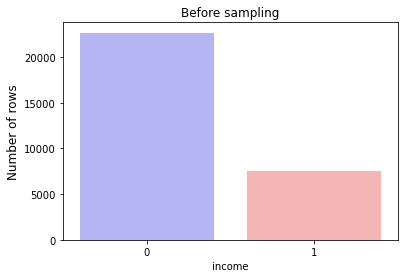

In [132]:
sns.countplot(x='income', data=sal_dummy_df, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.title('Before sampling')
plt.show()

In [133]:
X = sal_dummy_df.drop("income",axis=1)   #Feature Matrix
y = sal_dummy_df["income"]

In [134]:
#smote
from imblearn.over_sampling import SMOTE   
oversample = SMOTE()
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)

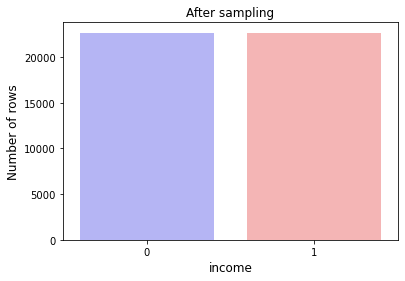

In [135]:
plt.figure(figsize=(6, 4))
sns.barplot(y_smote.value_counts().index.astype(int),
            y_smote.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('income', fontsize=12)
plt.title('After sampling')
plt.show()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,
                                                    y_smote,
                                                    test_size=0.2,
                                                    random_state=0)

In [138]:
X_train

,age,education,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
29231,24,3,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
321,49,4,0,1977,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23284,22,2,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42621,41,1,0,0,60,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6847,23,2,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,32,3,7688,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21243,45,1,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
42613,53,1,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,40,2,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Running Models without feature selection

[0.8297931  0.8377931  0.83862069 0.83724138 0.83282759 0.832
 0.8294702  0.82229581 0.83388521 0.8316777 ]
0.8325604780391261
0.004599007962365957
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4417
           1       0.82      0.88      0.85      4645

    accuracy                           0.84      9062
   macro avg       0.84      0.84      0.84      9062
weighted avg       0.84      0.84      0.84      9062



<AxesSubplot:>

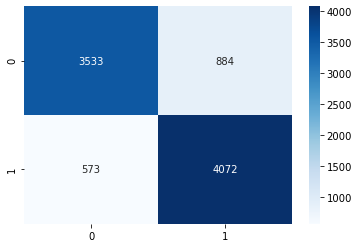

In [143]:
#GaussianNB
gb = GaussianNB()
gb_scores = cross_val_score(gb, X_train, y_train, cv=10,scoring = "accuracy" );
print(gb_scores)
print(gb_scores.mean())
print(gb_scores.std())

gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(classification_report(y_test, gb_pred))

cf_matrix_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cf_matrix_gb, annot = True, cmap='Blues', fmt='g')

Accuracy:[0.83558621 0.85296552 0.82593103 0.84551724 0.85517241 0.84248276
 0.83443709 0.8388521  0.85320088 0.83692053]
Mean:0.8421065768440282
Standard Deviation:0.009077233398012944
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      4417
           1       0.79      0.94      0.86      4645

    accuracy                           0.85      9062
   macro avg       0.86      0.84      0.84      9062
weighted avg       0.86      0.85      0.84      9062



<AxesSubplot:>

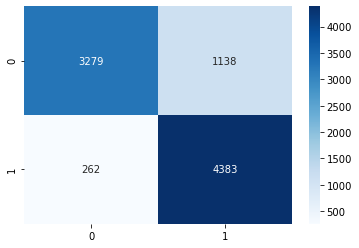

In [150]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=10,scoring = "accuracy" );
print("Accuracy:{}".format(knn_scores))
print("Mean:{}".format(knn_scores.mean()))
print("Standard Deviation:{}".format(knn_scores.std()))

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

cf_matrix_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cf_matrix_knn, annot = True, cmap='Blues', fmt='g')

In [151]:
knn_accuracy_score=accuracy_score(y_test,knn_pred)

knn_train_score=knn.score(X_train,y_train)

knn_f1_score=f1_score(y_test,knn_pred)

knn_recall_score=recall_score(y_test,knn_pred)

knn_precision_score=precision_score(y_test,knn_pred)

## COMPARE THE RESULTS

In [153]:
results_B4_Feature_selection=pd.DataFrame({
    "Algorithm":["GaussianNB","KNeighborsClassifier"],
    "Accuracy":[gb_accuracy_score,knn_accuracy_score],
    "Train Score":[gb_train_score,knn_train_score],
    "f1_Score":[gb_f1_score,knn_f1_score],
     "Recall_Score":[gb_recall_score,knn_recall_score],
      "Precision_Score":[gb_precision_score,knn_precision_score]})

results_B4_Feature_selection.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
1,KNeighborsClassifier,0.845509,0.886581,0.862286,0.943595,0.793878
0,GaussianNB,0.839219,0.832478,0.848245,0.876642,0.821630


## Feature Selection

                           Specs         Score
11    marital.status_not-married  11316.071630
28        relationship_Own-child   5204.263579
1                      education   4657.421063
26    relationship_Not-in-family   4491.547119
0                            age   4164.721619
12          marital.status_other   4035.771129
4                 hours.per.week   3436.090711
19      occupation_Other-service   3029.547075
35                      sex_Male   2544.071433
29        relationship_Unmarried   2481.246377
6              workclass_Private   1779.791956
2                   capital.gain   1572.938238
32                    race_Black   1363.065402
17  occupation_Handlers-cleaners   1027.816982
3                   capital.loss    992.208358


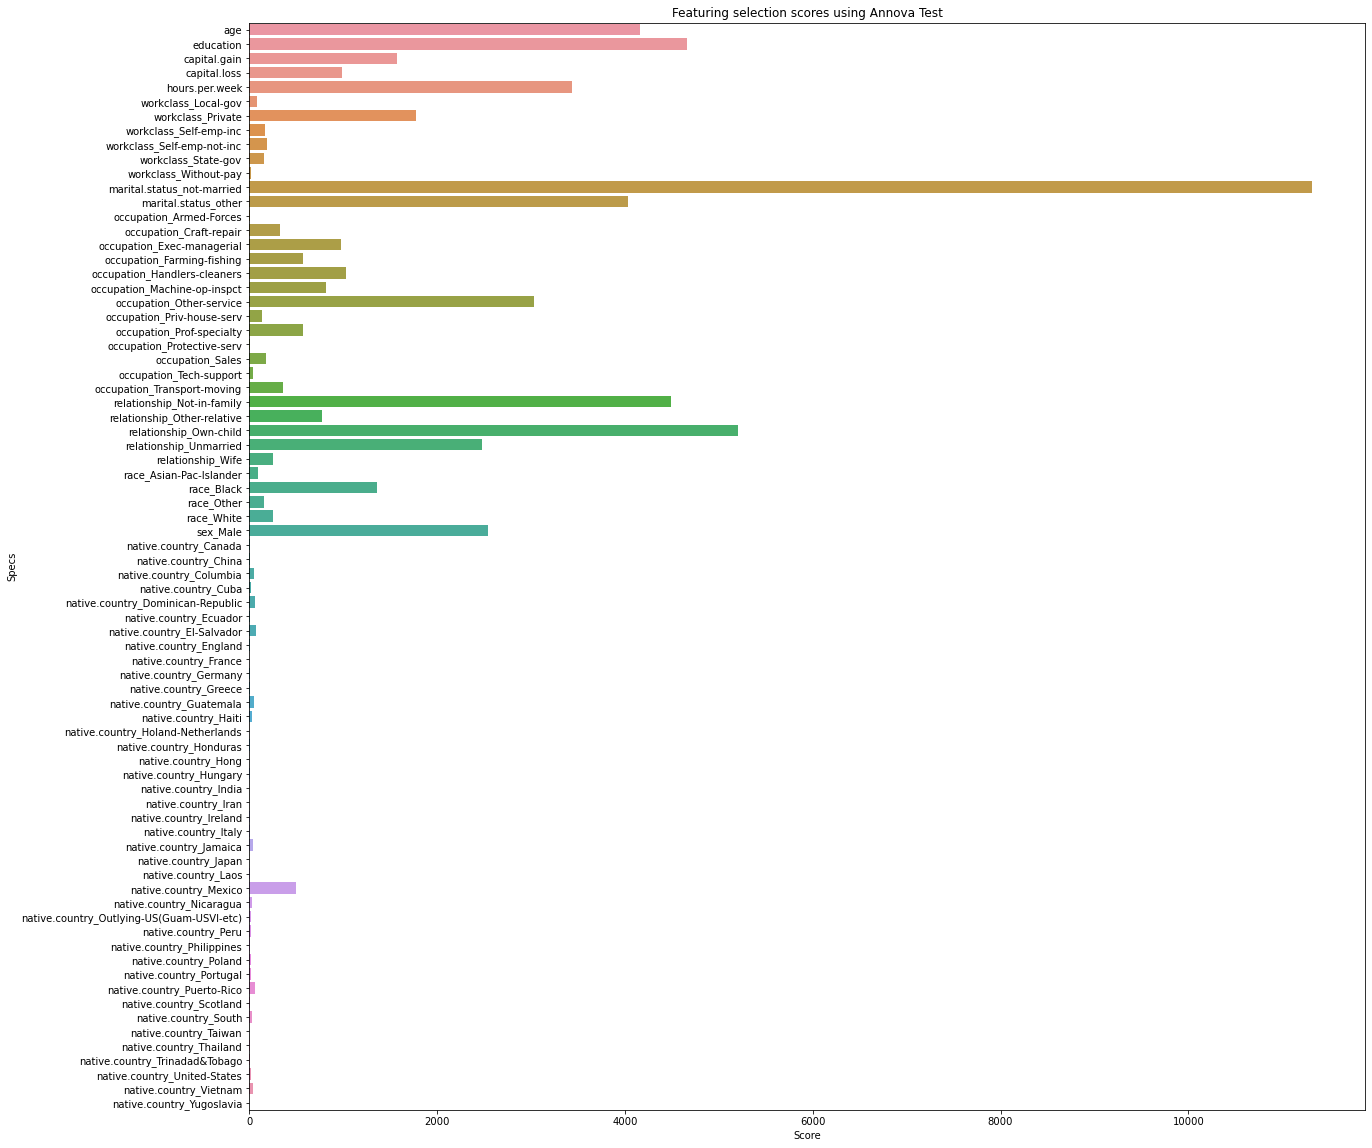

In [190]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_smote,y_smote)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

plt.figure(figsize = (20,20))
plt.title("Featuring selection scores using Annova Test")

ax = sns.barplot(x="Score", y="Specs", data=featureScores)

In [184]:
featureScores.to_csv('featureScores.csv')

In [191]:
X_smote

,age,education,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,82,1,0,4356,18,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,54,0,0,3900,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,41,2,0,3900,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,34,1,0,3770,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,38,0,0,3770,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45303,61,2,0,0,15,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45304,53,4,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45305,44,2,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45306,40,1,5178,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
Best_Features = X_smote[['marital.status_not-married','relationship_Own-child', 'education', 'relationship_Not-in-family','age', 'marital.status_other', 'hours.per.week', 'occupation_Other-service','sex_Male','relationship_Unmarried', 'workclass_Private', 'capital.gain', 'race_Black', 'occupation_Handlers-cleaners']].copy()

In [193]:
Best_Features

,marital.status_not-married,relationship_Own-child,education,relationship_Not-in-family,age,marital.status_other,hours.per.week,occupation_Other-service,sex_Male,relationship_Unmarried,workclass_Private,capital.gain,race_Black,occupation_Handlers-cleaners
0,0,0,1,1,82,1,18,0,0,0,1,0,0,0
1,0,0,0,0,54,1,40,0,0,1,1,0,0,0
2,0,1,2,0,41,1,40,0,0,0,1,0,0,0
3,0,0,1,0,34,1,45,1,0,1,1,0,0,0
4,0,0,0,0,38,1,40,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45303,0,0,2,0,61,0,15,0,0,0,0,0,0,0
45304,0,0,4,0,53,0,40,0,1,0,0,0,0,0
45305,0,0,2,0,44,0,50,0,1,0,0,0,0,0
45306,0,0,1,0,40,0,40,0,1,0,0,5178,0,0


In [194]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(Best_Features,
                                                    y_smote,
                                                    test_size=0.2,
                                                    random_state=0)

## Running Models with selecting Top 10 Best features

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4417
           1       0.81      0.85      0.83      4645

    accuracy                           0.82      9062
   macro avg       0.82      0.82      0.82      9062
weighted avg       0.82      0.82      0.82      9062



<AxesSubplot:>

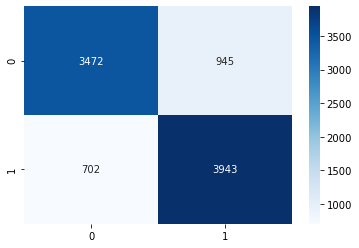

In [195]:
#GaussianNB
gb_emp = GaussianNB()
gb_emp_scores = cross_val_score(gb_emp, new_X_train, new_y_train, cv=10,scoring = "accuracy" );
gb_emp.fit(new_X_train,new_y_train)

gb_emp_pred=gb_emp.predict(new_X_test)
print(classification_report(new_y_test, gb_emp_pred))

cf_matrix_gbemp = confusion_matrix(new_y_test, gb_emp_pred)
sns.heatmap(cf_matrix_gbemp, annot = True, cmap='Blues', fmt='g')



In [196]:
gbemp_accuracy_score=accuracy_score(new_y_test,gb_emp_pred)

gbemp_train_score=gb_emp.score(new_X_train,new_y_train)

gbemp_f1_score=f1_score(new_y_test,gb_emp_pred)

gbemp_recall_score=recall_score(new_y_test,gb_emp_pred)

gbemp_precision_score=precision_score(new_y_test,gb_emp_pred)

[0.82041379 0.82482759 0.8182069  0.8217931  0.83558621 0.82427586
 0.82505519 0.81484547 0.83471302 0.81098234]
0.8230699474765928
0.00739452263678171
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4417
           1       0.79      0.90      0.84      4645

    accuracy                           0.82      9062
   macro avg       0.83      0.82      0.82      9062
weighted avg       0.83      0.82      0.82      9062



<AxesSubplot:>

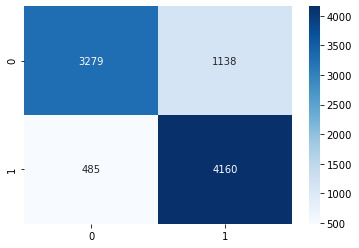

In [198]:
#Knn
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn_emp = KNeighborsClassifier(n_neighbors = 5)
knn_emp_scores = cross_val_score(knn_emp, new_X_train, new_y_train, cv=10,scoring = "accuracy" );
print(knn_emp_scores)
print(knn_emp_scores.mean())
print(knn_emp_scores.std())

knn_emp.fit(new_X_train,new_y_train)
knn_emp_pred = knn_emp.predict(new_X_test)

print(classification_report(new_y_test, knn_emp_pred))

cf_matrix_knnemp = confusion_matrix(new_y_test, knn_emp_pred)
sns.heatmap(cf_matrix_knnemp, annot = True, cmap='Blues', fmt='g')

In [199]:

knnemp_accuracy_score=accuracy_score(new_y_test,knn_emp_pred)

knnemp_train_score=knn_emp.score(new_X_train,new_y_train)

knnemp_f1_score=f1_score(new_y_test,knn_emp_pred)

knnemp_recall_score=recall_score(new_y_test,knn_emp_pred)

knnemp_precision_score=precision_score(new_y_test,knn_emp_pred)

In [200]:
results1=pd.DataFrame({
    "Algorithm":["GaussianNB","KNeighborsClassifier"],
    "Accuracy":[gbemp_accuracy_score,knnemp_accuracy_score],
    "Train Score":[gbemp_train_score,knnemp_train_score],
    "f1_Score":[gbemp_f1_score,knnemp_f1_score],
     "Recall_Score":[gbemp_recall_score,knnemp_recall_score],
      "Precision_Score":[gbemp_precision_score,knnemp_precision_score]})

results1.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
1,KNeighborsClassifier,0.820900,0.862881,0.836770,0.895587,0.785202
0,GaussianNB,0.818252,0.813055,0.827232,0.848870,0.806669


In [201]:
results_B4_Feature_selection=pd.DataFrame({
    "Algorithm":["GaussianNB","KNeighborsClassifier"],
    "Accuracy":[gb_accuracy_score,knn_accuracy_score],
    "Train Score":[gb_train_score,knn_train_score],
    "f1_Score":[gb_f1_score,knn_f1_score],
     "Recall_Score":[gb_recall_score,knn_recall_score],
      "Precision_Score":[gb_precision_score,knn_precision_score]})

results_B4_Feature_selection.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
1,KNeighborsClassifier,0.845509,0.886581,0.862286,0.943595,0.793878
0,GaussianNB,0.839219,0.832478,0.848245,0.876642,0.821630
